In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
crack_images_name_list = os.listdir('dataset/train/crack/')
noncrack_images_name_list = os.listdir('dataset/train/non-crack/')

In [3]:
noncrack_images_name_list.remove('labels.txt')

In [4]:
image_width = 256
image_heigth = 256

In [5]:
crack_images_list = []
for image_name in crack_images_name_list:
    im = cv2.imread('dataset/train/crack/'+ image_name, cv2.IMREAD_GRAYSCALE)
    #im_color = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
    im_resized = cv2.resize(im, (image_width, image_heigth))
    im_blur = cv2.medianBlur(im_resized, 3)
    crack_images_list.append(im_blur)
    
noncrack_images_list = []
for image_name in noncrack_images_name_list:
    im = cv2.imread('dataset/train/non-crack/'+ image_name, cv2.IMREAD_GRAYSCALE)
    #im_color = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    #im_color = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
    im_resized = cv2.resize(im, (image_width, image_heigth))
    im_blur = cv2.medianBlur(im_resized, 3)
    noncrack_images_list.append(im_blur)

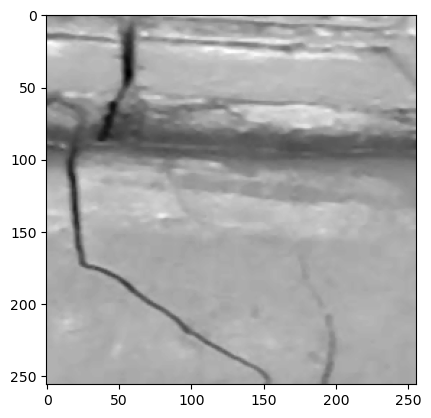

In [6]:
plt.imshow(crack_images_list[210], cmap='gray')

In [7]:
# usamos
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(30,30))

clahe_processed = []
for image in crack_images_list:
    clahe_processed.append(clahe.apply(image))

#save_single_channel_processed_images_for_comparison(crack_images_list, \
#                                                    crack_images_name_list, \
#                                                    clahe_processed, \
#                                                    'clahe')

#image_test_clahe = crack_images_list[210].copy()
#enhanced_img = clahe.apply(image_test_clahe)
#enhanced_img = cv2.cvtColor(image_test_clahe, cv2.COLOR_GRAY2RGB)

#result = np.hstack((image_test_clahe, enhanced_img))
#cv2.imshow('Result', result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [8]:
# nao usamos
thresholded_clahe_crack_images = []
for image in clahe_processed:
    ret, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresholded_clahe_crack_images.append(thresholded)

In [11]:
# nao usamos
save_single_channel_processed_images_for_comparison(clahe_processed, \
                                                    crack_images_name_list, \
                                                    thresholded_clahe_crack_images, \
                                                    'clahe-otsu')

In [20]:
# usamos
darker_clahe = []
for image in clahe_processed:
    min_pixel_value = np.min(image)
    darker_image = image - min_pixel_value
    darker_clahe.append(darker_image)
    
save_single_channel_processed_images_for_comparison(clahe_processed, \
                                                    crack_images_name_list, \
                                                    darker_clahe, \
                                                    'clahe-darker')

In [23]:
# usamos
eroded_darker_clahe = []
erosion_size = 2
for image in darker_clahe:
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
 
    erosion_dst = cv2.erode(image, element, iterations = 3)
    
    eroded_darker_clahe.append(erosion_dst)

In [24]:
save_single_channel_processed_images_for_comparison(darker_clahe, \
                                                    crack_images_name_list, \
                                                    eroded_darker_clahe, \
                                                    'clahe-darker-eroded')

In [29]:
# usamos
dilated_eroded_darker_clahe = []
erosion_size = 2
for image in eroded_darker_clahe:
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
 
    dilated_dst = cv2.dilate(image, element, iterations = 2)
    
    dilated_eroded_darker_clahe.append(dilated_dst)

In [30]:
save_single_channel_processed_images_for_comparison(eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated')

In [36]:
# nao usamos
binary_masks_1 = []
for image in dilated_eroded_darker_clahe:
    threshold_value = 60  # Valor de limiar a ser definido
    binary_edges = (image < threshold_value).astype(np.uint8)*255
    binary_masks_1.append(binary_edges)

In [37]:
save_single_channel_processed_images_for_comparison(dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    binary_masks_1, \
                                                    'clahe-darker-eroded-dilated-binary-60')

In [38]:
# SOBEL OPERATOR
sobel_dilated_eroded_darker_clahe = []
for image in dilated_eroded_darker_clahe:
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    
    sobel_dilated_eroded_darker_clahe.append(gradient_magnitude)

In [39]:
save_single_channel_processed_images_for_comparison(dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    sobel_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-sobel')

In [40]:
binary_masks_2 = []
for image in sobel_dilated_eroded_darker_clahe:
    threshold_value = 100  # Valor de limiar a ser definido
    binary_edges = (image < threshold_value).astype(np.uint8)*255
    binary_masks_2.append(binary_edges)

In [41]:
save_single_channel_processed_images_for_comparison(sobel_dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    binary_masks_2, \
                                                    'clahe-darker-eroded-dilated-sobel-binary-100')

In [43]:
laplacian_dilated_eroded_darker_clahe = []
for image in dilated_eroded_darker_clahe:
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    laplacian_dilated_eroded_darker_clahe.append(laplacian)

In [44]:
save_single_channel_processed_images_for_comparison(dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    laplacian_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-laplacian')

In [85]:
adaptthresh_dilated_eroded_darker_clahe = []
for image in dilated_eroded_darker_clahe:
    image_threshold = \
        cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptthresh_dilated_eroded_darker_clahe.append(cv2.bitwise_not(image_threshold))

In [72]:
save_single_channel_processed_images_for_comparison(dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    adaptthresh_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-adaptthresh-11-2')

In [101]:
eroded_adaptthresh_dilated_eroded_darker_clahe = []
erosion_size = 2
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
for image in adaptthresh_dilated_eroded_darker_clahe:
    erosion_dst = cv2.erode(image, element, iterations = 1)
    eroded_adaptthresh_dilated_eroded_darker_clahe.append(erosion_dst)

In [78]:
medianfilter_adaptthresh_dilated_eroded_darker_clahe = []
for image in adaptthresh_dilated_eroded_darker_clahe:
    median = cv2.medianBlur(image, 5)
    medianfilter_adaptthresh_dilated_eroded_darker_clahe.append(median)

In [74]:
save_single_channel_processed_images_for_comparison(adaptthresh_dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    medianfilter_adaptthresh_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-adaptthresh-11-2-medianfilter')

In [108]:
conncomp_adaptthresh_dilated_eroded_darker_clahe = []
for image in adaptthresh_dilated_eroded_darker_clahe:
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
    
    areas = [stats[i, cv2.CC_STAT_AREA] for i in range(1, num_labels)]
    max_area = np.max(areas) * 0.2
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] < max_area:
            labels[labels == i] = 0
    
    imagem_sem_ruido = (labels > 0).astype(np.uint8) * 255
    conncomp_adaptthresh_dilated_eroded_darker_clahe.append(imagem_sem_ruido)

In [109]:
save_single_channel_processed_images_for_comparison(eroded_adaptthresh_dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    conncomp_adaptthresh_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-adaptthresh-11-2-conncomp-2')

In [50]:
enclosure_adaptthresh_dilated_eroded_darker_clahe = []
kernel = np.ones((4, 4), np.uint8)
for image in adaptthresh_dilated_eroded_darker_clahe:
    imagem_sem_ruido = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    enclosure_adaptthresh_dilated_eroded_darker_clahe.append(imagem_sem_ruido)

In [51]:
save_single_channel_processed_images_for_comparison(adaptthresh_dilated_eroded_darker_clahe, \
                                                    crack_images_name_list, \
                                                    enclosure_adaptthresh_dilated_eroded_darker_clahe, \
                                                    'clahe-darker-eroded-dilated-adaptthresh-11-2-enclosure')

In [252]:
save_single_channel_processed_images_for_comparison(sobel_eroded_clahe, \
                                                    crack_images_name_list, \
                                                    binary_masks_1, \
                                                    'binary-sobel-eroded-clahe')

In [212]:
canny_clahe = []
for image_clahe in clahe_processed:
    threshold_value, _ = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    canny_res = cv2.Canny(image_clahe, np.round(threshold_value * 0.5), np.round(threshold_value))
    canny_clahe.append(canny_res)

In [213]:
save_single_channel_processed_images_for_comparison(crack_images_list, \
                                                    crack_images_name_list, \
                                                    canny_clahe, \
                                                    'canny-clahe')

In [181]:
cv2.imshow('image', crack_images_list[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [120]:
new_img = np.zeros((256, 256, 3)).astype(np.uint8)
new_img[:,:,0] = crack_images_list[3][:,:,0]
new_img[:,:,1] = (crack_images_list[3][:,:,1]*1.5).astype(np.uint8)
new_img[:,:,2] = crack_images_list[3][:,:,2] #cv2.equalizeHist(

cv2.imshow('contrasted', cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
images_hsi = []
for image in crack_images_list:
    image_matrix = np.array(image)
    h_matrix, s_matrix, i_matrix = converter_RGB_para_HSI(image_matrix)
    images_hsi.append([h_matrix, s_matrix, i_matrix])

In [31]:
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))
#cv2.imshow('Hue', (images_hsi[3][0] / (2 * np.pi)).astype(np.uint8))
#cv2.imshow('Saturation', (images_hsi[3][1] * 255).astype(np.uint8))
#cv2.imshow('Intensity', (images_hsi[3][2] * 255).astype(np.uint8))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

hsi_image = np.zeros((256, 256, 3)).astype(np.uint8)
hsi_image[:,:,0] = ((images_hsi[1][0] / (2 * np.pi)) * 255).astype(np.uint8)
hsi_image[:,:,1] = (images_hsi[1][1] * 255).astype(np.uint8)
hsi_image[:,:,2] = (images_hsi[1][2] * 255).astype(np.uint8)

hue = hsi_image[:, :, 0]
saturation = hsi_image[:, :, 1]
intensity = hsi_image[:, :, 2]

contrast_factor = 12  # Adjust this value to control the contrast enhancement
enhanced_intensity = np.clip(intensity * contrast_factor, 0, 255).astype(np.uint8)

# Create the enhanced HSI image by combining the adjusted intensity with the original hue and saturation
enhanced_hsi_image = np.stack((hue, saturation, enhanced_intensity), axis=-1)

#enhanced_hsi_image

cv2.imshow('hsi', enhanced_hsi_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#axes[0].imshow((images_hsi[1][0] / (2 * np.pi)).astype(np.uint8), cmap='gray')
#axes[1].imshow((images_hsi[1][1] * 255).astype(np.uint8), cmap='gray')
#axes[2].imshow((images_hsi[1][2] * 255).astype(np.uint8), cmap='gray')

In [56]:
print(crack_images_list[0].shape)
new_img = np.zeros((256, 256, 3)).astype(np.uint8)
for x in range(image_width):
    for y in range(image_heigth):
        new_img[x,y,:] = colorsys.rgb_to_hsv(crack_images_list[0][x][y][0],crack_images_list[0][x][y][1],crack_images_list[0][x][y][2])

(256, 256, 3)


In [54]:
new_img.shape

(256, 256, 3)

In [57]:
cv2.imshow('hsi', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# OTSU THRESHOLD
thresholded_crack_images = []
for image in crack_images_list:
    ret, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresholded_crack_images.append(thresholded)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


In [10]:
def save_single_channel_processed_images_for_comparison(original_images_list, original_images_names_list, \
                                                        processed_images_with_single_channel, \
                                                        directory_to_save):
    height = original_images_list[0].shape[0]
    width = original_images_list[0].shape[1]
    
    for idx in range(len(original_images_names_list)):
        
        collage_width = original_images_list[idx].shape[1] * 2
        collage = np.ones((height, collage_width), np.uint8) * 255
        collage = cv2.resize(collage, (collage_width, height))
        
        collage[:, :original_images_list[idx].shape[1]] = original_images_list[idx]
        collage[:, original_images_list[idx].shape[1]:] = processed_images_with_single_channel[idx]
        
        if not os.path.exists('processed-dataset-tests/' + directory_to_save):
            os.makedirs('processed-dataset-tests/' + directory_to_save)
        cv2.imwrite('processed-dataset-tests/' + directory_to_save + '/' + original_images_names_list[idx], collage)

In [78]:
save_single_channel_processed_images_for_comparison(crack_images_list, \
                                                    crack_images_name_list, \
                                                    thresholded_crack_images, \
                                                    'only-otsu')

In [82]:
# SOBEL OPERATOR
sobel_images = []
canny_images = []
for image in crack_images_list:
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    
    sobel_images.append(gradient_magnitude)
    
    canny_edges = cv2.Canny(gradient_magnitude, threshold1=50, threshold2=150)
    
    canny_images.append(canny_edges)

In [83]:
save_single_channel_processed_images_for_comparison(crack_images_list, \
                                                    crack_images_name_list, \
                                                    sobel_images, \
                                                    'only-sobel')

In [85]:
save_single_channel_processed_images_for_comparison(crack_images_list, \
                                                    crack_images_name_list, \
                                                    canny_images, \
                                                    'only-canny')

In [87]:
# SOBEL + OTSU THRESHOLD
sobel_otsu_crack_images = []
for image in sobel_images:
    ret, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    sobel_otsu_crack_images.append(thresholded)

In [88]:
save_single_channel_processed_images_for_comparison(crack_images_list, \
                                                    crack_images_name_list, \
                                                    sobel_otsu_crack_images, \
                                                    'sobel-and-otsu')

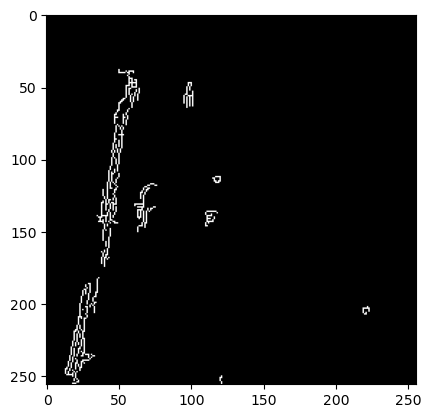

In [81]:
plt.imshow(sobel_images[1], cmap='gray')